<a href="https://colab.research.google.com/github/sivaram9899/sivaramAML/blob/main/Siva_Assignment_3_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3 - RRN - Weather Time Series Forcasting**

# **Name: Kumar Naga Sivaram**

**An example of temperature forecasting using data uploaded from Amazon Web Services (AWS)/keras**

In [1]:
!pip install tensorflow==2.12

In [2]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2024-11-27 22:21:46--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.106.48, 3.5.24.63, 52.216.59.0, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.106.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  6.20MB/s    in 2.1s    

2024-11-27 22:21:49 (6.20 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


**Examining the Jena weather dataset, which contains 15 features and 420451 rows.**


In [8]:
import os

# Define the file path and name
file_path = os.path.join("jena_climate_2009_2016.csv")

# Open and read the file content
with open(file_path) as file:
    file_content = file.read()

# Split the data into lines
all_lines = file_content.split("\n")

# Extract the header row (first line) and the remaining data lines
column_headers = all_lines[0].split(",")
data_lines = all_lines[1:]

# Display the column headers and count the total number of data rows
print(column_headers)
print(len(data_lines))

# Calculate the number of columns (variables) and rows in the dataset
total_columns = len(column_headers)
print("Number of variables:", total_columns)

total_rows = len(data_lines)
print("Number of rows:", total_rows)


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451
Number of variables: 15
Number of rows: 420451


**Parsing the data entails transforming the values separated by commas into floating-point numbers, after which particular values are stored in the raw_data and temperature arrays for additional processing or analysis.**

In [9]:
import numpy as np

# Initializing arrays for storing temperature and processed dataset values
temp_values = np.zeros((len(data_lines),))  # Array to store temperature-related data
dataset_array = np.zeros((len(data_lines), len(column_headers) - 1))  # 2D array for the rest of the dataset

# Loop through each line in the dataset
for idx, line_content in enumerate(data_lines):
    # Convert comma-separated string values (excluding the first column) into a list of floats
    row_data = [float(val) for val in line_content.split(",")[1:]]

    # Store the second column value (e.g., temperature) in the temp_values array
    temp_values[idx] = row_data[1]

    # Store all remaining row values in the dataset_array
    dataset_array[idx, :] = row_data[:]


**The temperature time series is plotted.**

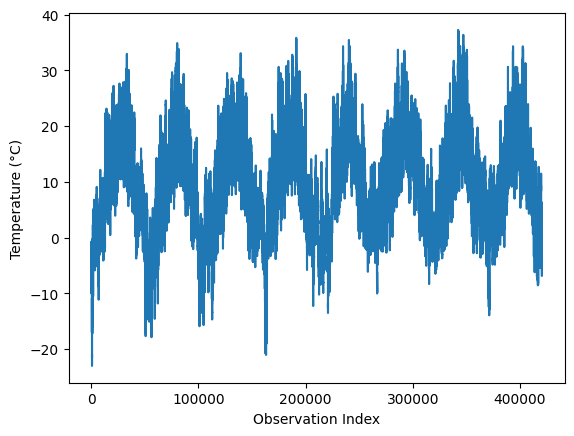

In [10]:
from matplotlib import pyplot as plt

# Plotting the temperature data
plt.plot(range(len(temp_values)), temp_values)  # x-axis: data points, y-axis: temperature values

# Adding labels to the axes
plt.xlabel('Observation Index')  # Label for the x-axis
plt.ylabel('Temperature (°C)')  # Label for the y-axis
plt.show()


**Plotting the temperature timeseries for the first 10 days: Since a day's data contains 144 data points, 10 days will have 1440 data points.**


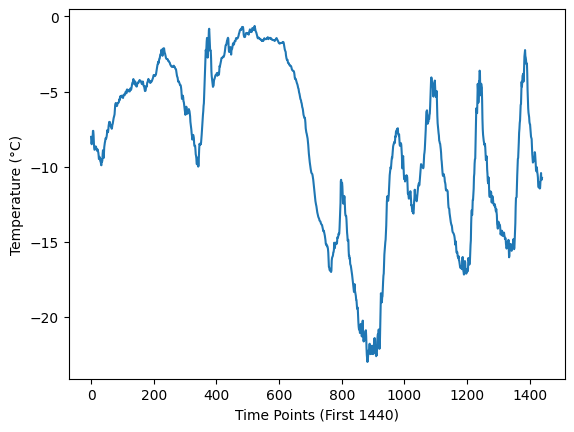

In [11]:
from matplotlib import pyplot as plt

# Plotting the first 1440 temperature data points
plt.plot(range(1440), temp_values[:1440])  # x-axis: first 1440 indices, y-axis: temperature values

# Adding labels to the axes
plt.xlabel('Time Points (First 1440)')  # Label for the x-axis
plt.ylabel('Temperature (°C)')  # Label for the y-axis
plt.show()


**Determining how many samples we'll use for each data split: 25% for validation, 50% for training**


In [12]:
# Calculate the number of samples for training, validation, and testing
train_sample_count = int(0.5 * len(dataset_array))  # 50% of data for training
val_sample_count = int(0.25 * len(dataset_array))  # 25% of data for validation
test_sample_count = len(dataset_array) - train_sample_count - val_sample_count  # Remaining data for testing

# Print the sample counts for each dataset split
print("Training samples:", train_sample_count)
print("Validation samples:", val_sample_count)
print("Testing samples:", test_sample_count)


Training samples: 210225
Validation samples: 105112
Testing samples: 105114


### **Getting the data ready**

**Normalizing the data: Vectorization is not required because the data is already in a numerical format. However, it is advisable to normalize all variables because the data scales vary, with pressure reported in millibars and temperature varying from -20 to +30.


In [13]:
# Calculate the mean of the training data
train_mean = dataset_array[:train_sample_count].mean(axis=0)

# Normalize the dataset by subtracting the mean
dataset_array -= train_mean

# Calculate the standard deviation of the training data
train_std = dataset_array[:train_sample_count].std(axis=0)

# Normalize the dataset by dividing by the standard deviation
dataset_array /= train_std


In [14]:
import numpy as np
from tensorflow import keras

# Create a sequence of integers
integer_sequence = np.arange(10)

# Generate a dummy time-series dataset
time_series_dataset = keras.utils.timeseries_dataset_from_array(
    data=integer_sequence[:-3],  # Input sequence excluding the last 3 elements
    targets=integer_sequence[3:],  # Targets start 3 steps ahead of the input sequence
    sequence_length=3,  # Length of each input sequence
    batch_size=2,  # Number of sequences per batch
)

# Iterate through the dataset to display inputs and their corresponding targets
for sequences, labels in time_series_dataset:
    for j in range(sequences.shape[0]):  # Loop through each batch
        print([int(value) for value in sequences[j]], int(labels[j]))


[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


**Setting up datasets for testing, validation, and training is necessary due to the dataset's highly redundant samples. Therefore, explicitly allocating memory for every sample would be inefficient. Rather, the samples will be dynamically generated.


In [15]:
# Define parameters for dataset creation
sampling_interval = 6  # Interval at which samples are taken
seq_length = 120  # Length of each input sequence
forecast_delay = sampling_interval * (seq_length + 24 - 1)  # Delay for targets
batch_size_config = 256  # Batch size for dataset generation

# Create training dataset
training_dataset = keras.utils.timeseries_dataset_from_array(
    dataset_array[:-forecast_delay],  # Input data excluding last delay points
    targets=temp_values[forecast_delay:],  # Targets starting after the delay
    sampling_rate=sampling_interval,
    sequence_length=seq_length,
    shuffle=True,  # Shuffle the training data
    batch_size=batch_size_config,
    start_index=0,  # Start at the beginning of the dataset
    end_index=train_sample_count,  # End at the training dataset limit
)

# Create validation dataset
validation_dataset = keras.utils.timeseries_dataset_from_array(
    dataset_array[:-forecast_delay],  # Input data excluding last delay points
    targets=temp_values[forecast_delay:],  # Targets starting after the delay
    sampling_rate=sampling_interval,
    sequence_length=seq_length,
    shuffle=True,  # Shuffle the validation data
    batch_size=batch_size_config,
    start_index=train_sample_count,  # Start where training data ends
    end_index=train_sample_count + val_sample_count,  # End at the validation dataset limit
)

# Create testing dataset
testing_dataset = keras.utils.timeseries_dataset_from_array(
    dataset_array[:-forecast_delay],  # Input data excluding last delay points
    targets=temp_values[forecast_delay:],  # Targets starting after the delay
    sampling_rate=sampling_interval,
    sequence_length=seq_length,
    shuffle=True,  # Shuffle the testing data
    batch_size=batch_size_config,
    start_index=train_sample_count + val_sample_count,  # Start where validation data ends
)


**Examining the results of one of our datasets**

In [16]:
# Iterate through the training dataset and print the shapes of samples and targets
for input_sequences, output_values in training_dataset:
    print("Input sequences shape:", input_sequences.shape)  # Shape of the input sequences
    print("Output values shape:", output_values.shape)  # Shape of the target values
    break  # Only print the shape of the first batch, then exit the loop


Input sequences shape: (256, 120, 14)
Output values shape: (256,)


### **A sensible, non-machine-learning starting point**



**Determining the baseline of common sense MAE: This specified function "evaluate_naive_method" offers a starting point for assessing how well a straightforward forecasting technique performs, in which the final value in the input sequence is utilized to predict the subsequent value.**


In [17]:
def evaluate_naive_approach(data):
    total_absolute_error = 0.  # Variable to accumulate total absolute error
    total_samples = 0  # Counter for the number of samples processed

    # Iterate through the dataset
    for input_sequences, target_values in data:
        # Make predictions using the last feature of the sequence
        predictions = input_sequences[:, -1, 1] * train_std[1] + train_mean[1]

        # Calculate the absolute error for the current batch and accumulate
        total_absolute_error += np.sum(np.abs(predictions - target_values))

        # Count the number of samples in the current batch
        total_samples += input_sequences.shape[0]

    # Return the average absolute error per sample
    return total_absolute_error / total_samples

# Evaluate the model on the validation and test datasets
print(f"Validation MAE: {evaluate_naive_approach(validation_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_approach(testing_dataset):.2f}")


Validation MAE: 2.44
Test MAE: 2.62


Predicting that the temperature will be exactly the same 24 hours from now is a sensible baseline strategy. With this simple baseline, the test MAE is 2.62 degrees Celsius, while the validation MAE (Mean Absolute Error) is 2.44 degrees Celsius. In other words, there would be an average deviation of roughly two and a half degrees if the future temperature remained constant with the present one.


### **Dense Layer, a fundamental machine-learning model**


**Developing and assessing a model with many connections**


In [18]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the input layer with shape (sequence_length, number of features)
input_layer = keras.Input(shape=(seq_length, dataset_array.shape[-1]))

# Flatten the input to a 1D vector for dense layer processing
flattened = layers.Flatten()(input_layer)

# Add a dense layer with 16 units and ReLU activation
hidden_layer = layers.Dense(16, activation="relu")(flattened)

# Output layer with a single neuron (for regression or single value prediction)
output_layer = layers.Dense(1)(hidden_layer)

# Create the model by specifying the input and output layers
neural_network_model = keras.Model(input_layer, output_layer)


In [19]:
# Define the callbacks for the model training
training_callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.keras",  # Save the best model
                                    save_best_only=True)  # Only save the model if it improves
]


In [20]:
# Compile the model with optimizer, loss function, and evaluation metrics
neural_network_model.compile(optimizer="adam",  # Using Adam optimizer for faster convergence
                             loss="mean_squared_error",  # Mean Squared Error for regression tasks
                             metrics=["mean_absolute_error"])  # Evaluating model using Mean Absolute Error (MAE)


In [21]:
# Train the model on the training dataset and validate using the validation dataset
training_history = neural_network_model.fit(training_dataset,  # Training data
                                            epochs=10,  # Number of training epochs
                                            validation_data=validation_dataset,  # Validation data
                                            callbacks=training_callbacks)  # Callbacks for saving the best model


Epoch 1/10
819/819 [==============================] - 14s 17ms/step - loss: 13.1533 - mean_absolute_error: 2.7750 - val_loss: 11.9405 - val_mean_absolute_error: 2.7342
Epoch 2/10
819/819 [==============================] - 14s 16ms/step - loss: 8.5863 - mean_absolute_error: 2.3022 - val_loss: 10.5152 - val_mean_absolute_error: 2.5621
Epoch 3/10
819/819 [==============================] - 14s 17ms/step - loss: 7.9533 - mean_absolute_error: 2.2167 - val_loss: 11.2305 - val_mean_absolute_error: 2.6534
Epoch 4/10
819/819 [==============================] - 14s 17ms/step - loss: 7.6048 - mean_absolute_error: 2.1686 - val_loss: 11.1607 - val_mean_absolute_error: 2.6429
Epoch 5/10
819/819 [==============================] - 14s 17ms/step - loss: 7.2962 - mean_absolute_error: 2.1258 - val_loss: 11.6013 - val_mean_absolute_error: 2.6903
Epoch 6/10
819/819 [==============================] - 14s 17ms/step - loss: 7.1129 - mean_absolute_error: 2.0985 - val_loss: 11.9370 - val_mean_absolute_error: 2.73

In [22]:
# Load the trained model from the saved file
loaded_model = keras.models.load_model("best_model.keras")

# Evaluate the model on the test dataset and print the Mean Absolute Error (MAE)
test_mae = loaded_model.evaluate(testing_dataset)  # Evaluate the model on test data
print(f"Test MAE: {test_mae[1]:.2f}")  # Display the MAE from the evaluation results


405/405 [==============================] - 5s 11ms/step - loss: 11.4052 - mean_absolute_error: 2.6525
Test MAE: 2.65


**Results for the plotting**

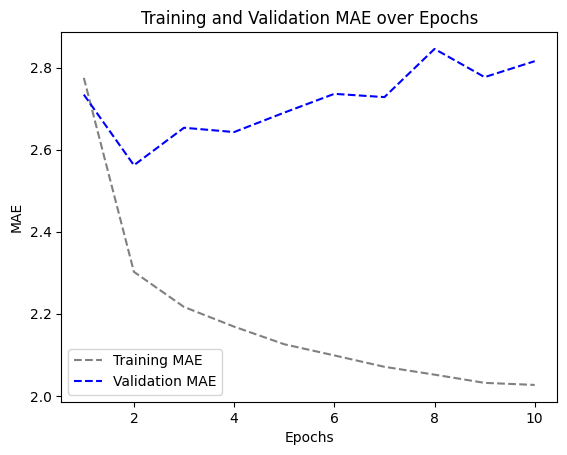

In [23]:
import matplotlib.pyplot as plt

# Extract the Mean Absolute Error (MAE) values from the training history
training_mae = training_history.history["mean_absolute_error"]
validation_mae = training_history.history["val_mean_absolute_error"]

# Create a range for the epochs
epoch_range = range(1, len(training_mae) + 1)

# Plot the MAE for training and validation data
plt.figure()
plt.plot(epoch_range, training_mae, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epoch_range, validation_mae, color="blue", linestyle="dashed", label="Validation MAE")

# Add title and labels
plt.title("Training and Validation MAE over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MAE")

# Display the legend
plt.legend()

# Show the plot
plt.show()


### **Let's try a 1D convolutional model**

In [24]:
# Define the neural network architecture
inputs_layer = keras.Input(shape=(seq_length, dataset_array.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs_layer)  # Apply a convolutional layer with 8 filters of size 24
x = layers.MaxPooling1D(2)(x)  # Apply max pooling with a pool size of 2
x = layers.Conv1D(8, 12, activation="relu")(x)  # Apply another convolutional layer with 8 filters of size 12
x = layers.MaxPooling1D(2)(x)  # Apply another max pooling
x = layers.Conv1D(8, 6, activation="relu")(x)  # Apply another convolutional layer with 8 filters of size 6
x = layers.GlobalAveragePooling1D()(x)  # Reduce dimensions by averaging over each feature
outputs_layer = layers.Dense(1)(x)  # Final output layer

# Create the model
cnn_model = keras.Model(inputs_layer, outputs_layer)

# Set up callbacks for saving the best model
model_callbacks = [
    keras.callbacks.ModelCheckpoint("best_cnn_model.keras",  # Save the best model
                                    save_best_only=True)
]

# Compile the model
cnn_model.compile(optimizer="rmsprop",  # Use RMSprop optimizer
                  loss="mean_squared_error",  # Use MSE as loss function
                  metrics=["mean_absolute_error"])  # Track MAE during training

# Train the model on the training dataset
training_history_cnn = cnn_model.fit(training_dataset,
                                     epochs=10,  # Train for 10 epochs
                                     validation_data=validation_dataset,  # Validate on validation data
                                     callbacks=model_callbacks)  # Use callbacks

# Load the best saved model
best_cnn_model = keras.models.load_model("best_cnn_model.keras")

# Evaluate the model on the test dataset and print the test MAE
print(f"Test MAE: {best_cnn_model.evaluate(testing_dataset)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 22s 26ms/step - loss: 22.4473 - mean_absolute_error: 3.7356 - val_loss: 19.1298 - val_mean_absolute_error: 3.4944
Epoch 2/10
819/819 [==============================] - 22s 27ms/step - loss: 16.2317 - mean_absolute_error: 3.2048 - val_loss: 17.6027 - val_mean_absolute_error: 3.3410
Epoch 3/10
819/819 [==============================] - 22s 26ms/step - loss: 14.5327 - mean_absolute_error: 3.0234 - val_loss: 15.4807 - val_mean_absolute_error: 3.0966
Epoch 4/10
819/819 [==============================] - 22s 27ms/step - loss: 13.6893 - mean_absolute_error: 2.9264 - val_loss: 18.4929 - val_mean_absolute_error: 3.3933
Epoch 5/10
819/819 [==============================] - 22s 27ms/step - loss: 13.1681 - mean_absolute_error: 2.8663 - val_loss: 15.5330 - val_mean_absolute_error: 3.1004
Epoch 6/10
819/819 [==============================] - 22s 27ms/step - loss: 12.7240 - mean_absolute_error: 2.8178 - val_loss: 16.6633 - val_mean_absolute_error:

Epoch 1/10
819/819 [==============================] - 24s 28ms/step - loss: 21.4160 - mean_absolute_error: 3.6311 - val_loss: 15.7699 - val_mean_absolute_error: 3.1441
Epoch 2/10
819/819 [==============================] - 23s 28ms/step - loss: 15.2318 - mean_absolute_error: 3.0861 - val_loss: 14.3387 - val_mean_absolute_error: 2.9998
Epoch 3/10
819/819 [==============================] - 22s 26ms/step - loss: 13.9438 - mean_absolute_error: 2.9503 - val_loss: 16.8873 - val_mean_absolute_error: 3.2347
Epoch 4/10
819/819 [==============================] - 22s 26ms/step - loss: 13.1664 - mean_absolute_error: 2.8646 - val_loss: 14.3770 - val_mean_absolute_error: 2.9738
Epoch 5/10
819/819 [==============================] - 22s 27ms/step - loss: 12.6055 - mean_absolute_error: 2.8013 - val_loss: 14.2248 - val_mean_absolute_error: 2.9751
Epoch 6/10
819/819 [==============================] - 23s 27ms/step - loss: 12.0758 - mean_absolute_error: 2.7419 - val_loss: 15.8897 - val_mean_absolute_error:

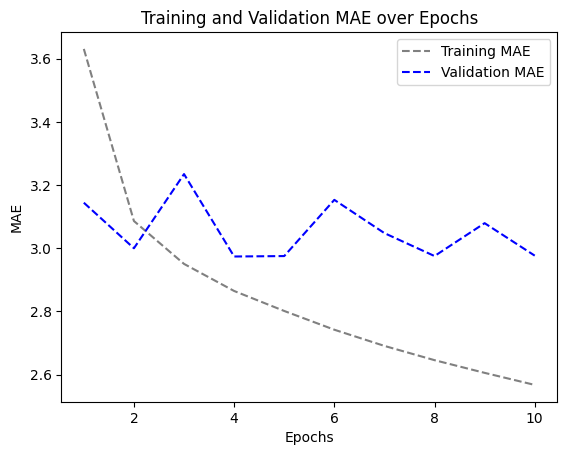

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the input layer with shape (sequence_length, number of features)
input_data = keras.Input(shape=(seq_length, dataset_array.shape[-1]))

# Convolutional layers with varying kernel sizes, ReLU activation, and pooling
conv_layer1 = layers.Conv1D(8, 24, activation="relu")(input_data)  # First Conv1D layer
pool_layer1 = layers.MaxPooling1D(2)(conv_layer1)  # First max pooling layer
conv_layer2 = layers.Conv1D(8, 12, activation="relu")(pool_layer1)  # Second Conv1D layer
pool_layer2 = layers.MaxPooling1D(2)(conv_layer2)  # Second max pooling layer
conv_layer3 = layers.Conv1D(8, 6, activation="relu")(pool_layer2)  # Third Conv1D layer
global_pool = layers.GlobalAveragePooling1D()(conv_layer3)  # Global average pooling layer

# Dense output layer
output_layer = layers.Dense(1)(global_pool)

# Create the model
conv_model = keras.Model(input_data, output_layer)

# Compile the model with RMSprop optimizer, MSE loss, and MAE metric
conv_model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])
# Train the model on the training dataset
training_history_conv = conv_model.fit(training_dataset,
                                       epochs=10,
                                       validation_data=validation_dataset,
                                       callbacks=training_callbacks)
# Extract the MAE values from the training history
training_mae_conv = training_history_conv.history["mean_absolute_error"]
validation_mae_conv = training_history_conv.history["val_mean_absolute_error"]

# Plotting the training and validation MAE
import matplotlib.pyplot as plt
epoch_range_conv = range(1, len(training_mae_conv) + 1)
plt.figure()
plt.plot(epoch_range_conv, training_mae_conv, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epoch_range_conv, validation_mae_conv, color="blue", linestyle="dashed", label="Validation MAE")
plt.title("Training and Validation MAE over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()


*Convolutional data appear to perform worse than dense models or common sense. Perhaps because

*-For weather data, the translation invariance assumption is not very reliable.

*- The data's order is very important. When it comes to forecasting the temperature for the next day, recent historical data is far more useful than data from a few days earlier. Sadly, this crucial temporal order cannot be adequately captured by a 1D convolutional neural network.







## **A Simple RNN**

### **1. An RNN layer capable of handling any length of sequence**


In [35]:
# Define the input shape with 14 features per timestep (None for sequence length)
num_input_features = 14
input_sequence = keras.Input(shape=(None, num_input_features))

# Create a SimpleRNN layer with 16 units
rnn_output = layers.SimpleRNN(16)(input_sequence)

# Create the RNN model
simple_rnn_model = keras.Model(input_sequence, rnn_output)

# Define callbacks for saving the best model during training
rnn_callbacks = [
    keras.callbacks.ModelCheckpoint("best_sim_rnn_model.keras",  # Save the best model
                                    save_best_only=True)  # Save only the model with the lowest validation loss
]

# Compile the model with RMSprop optimizer, MSE loss, and MAE as a metric
simple_rnn_model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

# Train the model using the training and validation datasets
rnn_training_history = simple_rnn_model.fit(training_dataset,  # Training data
                                            epochs=10,  # Number of epochs
                                            validation_data=validation_dataset,  # Validation data
                                            callbacks=rnn_callbacks)  # Model checkpoint callbacks

# Load the best model saved during training
best_rnn_model = keras.models.load_model("best_sim_rnn_model.keras")

# Evaluate the model on the test dataset and print the Mean Absolute Error (MAE)
test_mae_rnn = best_rnn_model.evaluate(testing_dataset)[1]
print(f"Test MAE: {test_mae_rnn:.2f}")  # Display the test MAE


Epoch 1/10
819/819 [==============================] - 23s 27ms/step - loss: 139.5169 - mean_absolute_error: 9.7233 - val_loss: 143.9539 - val_mean_absolute_error: 9.8956
Epoch 2/10
819/819 [==============================] - 22s 26ms/step - loss: 136.4481 - mean_absolute_error: 9.5646 - val_loss: 143.8325 - val_mean_absolute_error: 9.8881
Epoch 3/10
819/819 [==============================] - 22s 27ms/step - loss: 136.2933 - mean_absolute_error: 9.5505 - val_loss: 143.7118 - val_mean_absolute_error: 9.8708
Epoch 4/10
819/819 [==============================] - 21s 26ms/step - loss: 136.2455 - mean_absolute_error: 9.5462 - val_loss: 143.6155 - val_mean_absolute_error: 9.8543
Epoch 5/10
819/819 [==============================] - 22s 26ms/step - loss: 136.2268 - mean_absolute_error: 9.5414 - val_loss: 143.6454 - val_mean_absolute_error: 9.8644
Epoch 6/10
819/819 [==============================] - 23s 28ms/step - loss: 136.2567 - mean_absolute_error: 9.5484 - val_loss: 143.5695 - val_mean_abs

### **2. RNN-Layer stacking RNN in its simplest form.**


In [36]:
# Define the number of features and the number of time steps for each input sequence
num_input_features = 14
sequence_steps = 120

# Define the input shape with 120 timesteps and 14 features per timestep
input_sequence = keras.Input(shape=(sequence_steps, num_input_features))

# Build the RNN model with three SimpleRNN layers
rnn_layer1 = layers.SimpleRNN(16, return_sequences=True)(input_sequence)
rnn_layer2 = layers.SimpleRNN(16, return_sequences=True)(rnn_layer1)
rnn_output = layers.SimpleRNN(16)(rnn_layer2)

# Create the RNN model
rnn_model2 = keras.Model(input_sequence, rnn_output)

# Set up the callback to save the best model during training
model_callbacks = [
    keras.callbacks.ModelCheckpoint("best_srnn2_model.keras", save_best_only=True)  # Save only the best model
]

# Compile the model with RMSprop optimizer, Mean Squared Error loss, and MAE metric
rnn_model2.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

# Train the model using the training and validation datasets
rnn_history2 = rnn_model2.fit(training_dataset,  # Training data
                               epochs=10,  # Number of epochs
                               validation_data=validation_dataset,  # Validation data
                               callbacks=model_callbacks)  # Model checkpoint callbacks

# Load the best model saved during training
best_srnn2_model = keras.models.load_model("best_srnn2_model.keras")

# Evaluate the model on the test dataset and print the Mean Absolute Error (MAE)
test_mae_srnn2 = best_srnn2_model.evaluate(testing_dataset)[1]
print(f"Test MAE: {test_mae_srnn2:.2f}")  # Display the test MAE


Epoch 1/10
819/819 [==============================] - 61s 72ms/step - loss: 136.7829 - mean_absolute_error: 9.5691 - val_loss: 143.4460 - val_mean_absolute_error: 9.8413
Epoch 2/10
819/819 [==============================] - 60s 73ms/step - loss: 136.0013 - mean_absolute_error: 9.5204 - val_loss: 143.5094 - val_mean_absolute_error: 9.8501
Epoch 3/10
819/819 [==============================] - 60s 74ms/step - loss: 135.9550 - mean_absolute_error: 9.5143 - val_loss: 143.5617 - val_mean_absolute_error: 9.8649
Epoch 4/10
819/819 [==============================] - 60s 73ms/step - loss: 135.9395 - mean_absolute_error: 9.5119 - val_loss: 143.4113 - val_mean_absolute_error: 9.8376
Epoch 5/10
819/819 [==============================] - 59s 71ms/step - loss: 135.9234 - mean_absolute_error: 9.5092 - val_loss: 143.4086 - val_mean_absolute_error: 9.8356
Epoch 6/10
819/819 [==============================] - 60s 73ms/step - loss: 135.9068 - mean_absolute_error: 9.5072 - val_loss: 143.4151 - val_mean_abs

## **A Basic Gated Recurrent Unit (GRU)**


In [41]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Load your data (replace with actual data loading code)
# raw_data and temperature should already be loaded from your dataset

# Assuming raw_data and temperature are already defined
# Example:
# raw_data = np.random.rand(10000, 5)  # Replace with actual raw data
# temperature = np.random.rand(10000)  # Replace with actual temperature data

# Set the sequence length and sampling rate
sequence_length = 120  # Number of time steps in each sequence
sampling_rate = 6  # Sampling rate (can be adjusted)

# Calculate the delay (you may adjust this as necessary based on your dataset)
delay = sampling_rate * (sequence_length + 24 - 1)

# Calculate number of samples for training, validation, and testing
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples

# Create train, validation, and test datasets
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

# Define the GRU model
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))  # Adjust input shape based on your data
x = layers.GRU(16)(inputs)  # GRU layer with 16 units
outputs = layers.Dense(1)(x)  # Output layer for regression (1 output value)
model = keras.Model(inputs, outputs)

# Set up the callbacks to save the best model
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_gru.keras", save_best_only=True)
]

# Compile the model with RMSprop optimizer and MSE loss
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Train the model on the train dataset
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

# Load the best saved model and evaluate on the test set
model = keras.models.load_model("jena_gru.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 49s 58ms/step - loss: 96.7368 - mae: 7.8968 - val_loss: 56.5135 - val_mae: 6.0156
Epoch 2/10
819/819 [==============================] - 49s 60ms/step - loss: 50.6476 - mae: 5.5571 - val_loss: 37.0532 - val_mae: 4.7879
Epoch 3/10
819/819 [==============================] - 48s 59ms/step - loss: 39.4788 - mae: 4.8595 - val_loss: 30.8664 - val_mae: 4.3467
Epoch 4/10
819/819 [==============================] - 47s 57ms/step - loss: 32.7644 - mae: 4.4422 - val_loss: 26.7559 - val_mae: 4.0057
Epoch 5/10
819/819 [==============================] - 46s 57ms/step - loss: 28.9072 - mae: 4.2041 - val_loss: 26.4615 - val_mae: 3.9951
Epoch 6/10
819/819 [==============================] - 47s 58ms/step - loss: 26.8556 - mae: 4.0770 - val_loss: 25.3729 - val_mae: 3.9624
Epoch 7/10
819/819 [==============================] - 49s 60ms/step - loss: 25.8200 - mae: 4.0084 - val_loss: 26.1519 - val_mae: 4.0333
Epoch 8/10
819/819 [============================

Epoch 1/10
819/819 [==============================] - 50s 59ms/step - loss: 24.2815 - mae: 3.9092 - val_loss: 25.1943 - val_mae: 3.9354
Epoch 2/10
819/819 [==============================] - 47s 57ms/step - loss: 24.1048 - mae: 3.9016 - val_loss: 25.2829 - val_mae: 3.9531
Epoch 3/10
819/819 [==============================] - 46s 57ms/step - loss: 24.0017 - mae: 3.8939 - val_loss: 25.8145 - val_mae: 3.9728
Epoch 4/10
819/819 [==============================] - 47s 57ms/step - loss: 23.8994 - mae: 3.8868 - val_loss: 25.8125 - val_mae: 3.9990
Epoch 5/10
819/819 [==============================] - 46s 56ms/step - loss: 23.7753 - mae: 3.8764 - val_loss: 24.1893 - val_mae: 3.8627
Epoch 6/10
819/819 [==============================] - 48s 59ms/step - loss: 23.6810 - mae: 3.8689 - val_loss: 23.9146 - val_mae: 3.8529
Epoch 7/10
819/819 [==============================] - 49s 60ms/step - loss: 23.6074 - mae: 3.8634 - val_loss: 26.4772 - val_mae: 4.0450
Epoch 8/10
819/819 [============================

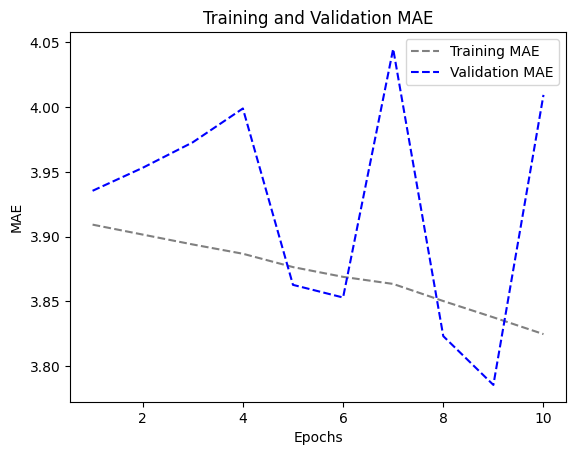

In [43]:
import matplotlib.pyplot as plt

# Assuming 'gru_history' is the history object from training the GRU model
# This variable must be assigned during the model training like this:
gru_history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

# Extract the MAE values from the training history of the GRU model
training_mae_gru = gru_history.history["mae"]  # Make sure the key matches the history
validation_mae_gru = gru_history.history["val_mae"]

# Create a range for epochs
epochs_gru = range(1, len(training_mae_gru) + 1)

# Plotting the Training and Validation MAE
plt.figure()
plt.plot(epochs_gru, training_mae_gru, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs_gru, validation_mae_gru, color="blue", linestyle="dashed", label="Validation MAE")
plt.title("Training and Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()


## **LSTM(Long Short-Term Memory )**

### **1.LSTM-Simple**

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the LSTM model
input_data = keras.Input(shape=(sequence_length, raw_data.shape[-1]))  # Input layer with sequence length and features
x = layers.LSTM(16)(input_data)  # LSTM layer with 16 units
output_data = layers.Dense(1)(x)  # Dense layer for the output

# Create the model
lstm_model = keras.Model(input_data, output_data)

# Define the callbacks for saving the best model during training
callbacks_list = [
    keras.callbacks.ModelCheckpoint("jena_lstm_model.keras", save_best_only=True)  # Save best model
]

# Compile the model
lstm_model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])  # Using RMSprop optimizer and MAE metric

# Train the model on the training dataset
training_history_lstm = lstm_model.fit(train_dataset,
                                       epochs=10,  # Number of epochs
                                       validation_data=val_dataset,  # Validation dataset
                                       callbacks=callbacks_list)  # Callbacks for saving the best model

# Load the best model after training
best_lstm_model = keras.models.load_model("jena_lstm_model.keras")

# Evaluate the model on the test dataset and print the MAE
test_mae = best_lstm_model.evaluate(test_dataset)
print(f"Test MAE: {test_mae[1]:.2f}")  # Print only the MAE value from the evaluation result


Epoch 1/10
819/819 [==============================] - 51s 61ms/step - loss: 111.9465 - mae: 8.5959 - val_loss: 80.4174 - val_mae: 7.2590
Epoch 2/10
819/819 [==============================] - 52s 64ms/step - loss: 68.8419 - mae: 6.5992 - val_loss: 51.5763 - val_mae: 5.7679
Epoch 3/10
819/819 [==============================] - 53s 64ms/step - loss: 56.9051 - mae: 5.8905 - val_loss: 45.0972 - val_mae: 5.3568
Epoch 4/10
819/819 [==============================] - 52s 63ms/step - loss: 49.9905 - mae: 5.4427 - val_loss: 38.5656 - val_mae: 4.8371
Epoch 5/10
819/819 [==============================] - 53s 64ms/step - loss: 43.9467 - mae: 5.0403 - val_loss: 33.6545 - val_mae: 4.4747
Epoch 6/10
819/819 [==============================] - 53s 65ms/step - loss: 38.7044 - mae: 4.6857 - val_loss: 30.3196 - val_mae: 4.2572
Epoch 7/10
819/819 [==============================] - 54s 66ms/step - loss: 34.1826 - mae: 4.3735 - val_loss: 25.6514 - val_mae: 3.8472
Epoch 8/10
819/819 [===========================

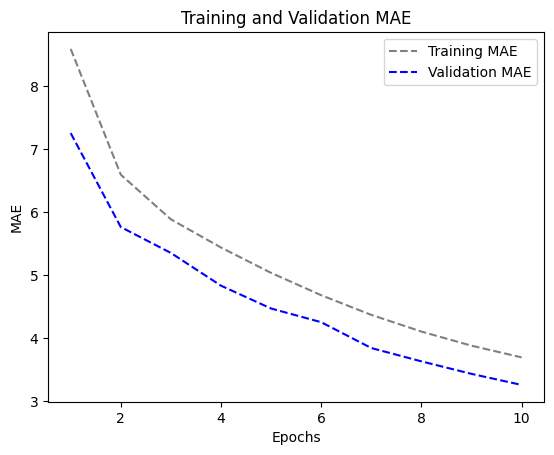

In [45]:
import matplotlib.pyplot as plt

# Extract the Mean Absolute Error (MAE) from the training history of the LSTM model
training_mae_lstm = training_history_lstm.history["mae"]  # MAE for training data
validation_mae_lstm = training_history_lstm.history["val_mae"]  # MAE for validation data

# Create a range for epochs
epochs_lstm = range(1, len(training_mae_lstm) + 1)

# Plotting the Training and Validation MAE
plt.figure()
plt.plot(epochs_lstm, training_mae_lstm, color="grey", linestyle="dashed", label="Training MAE")  # Training MAE in grey dashed line
plt.plot(epochs_lstm, validation_mae_lstm, color="blue", linestyle="dashed", label="Validation MAE")  # Validation MAE in blue dashed line
plt.title("Training and Validation MAE")  # Title of the plot
plt.xlabel("Epochs")  # Label for x-axis
plt.ylabel("MAE")  # Label for y-axis
plt.legend()  # Display the legend
plt.show()  # Display the plot


### **2.LSTM - dropout Regularization**

In [47]:
# Define the LSTM model with dropout layers
input_layer = keras.Input(shape=(sequence_length, raw_data.shape[-1]))  # Adjusted variable names
x = layers.LSTM(16, recurrent_dropout=0.25)(input_layer)  # LSTM layer with recurrent dropout
x = layers.Dropout(0.5)(x)  # Dropout layer with 50% rate
output_layer = layers.Dense(1)(x)  # Dense output layer with 1 unit for regression
lstm_model = keras.Model(input_layer, output_layer)

# Define a callback to save the best model
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout_model.keras", save_best_only=True)
]

# Compile the model with RMSProp optimizer and mean squared error loss
lstm_model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Fit the model on the training data with validation data and callback
train_history = lstm_model.fit(train_dataset,
                               epochs=10,
                               validation_data=val_dataset,
                               callbacks=callbacks)

# Load the best model saved during training
best_lstm_model = keras.models.load_model("jena_lstm_dropout_model.keras")

# Evaluate the model on the test dataset
test_mae = best_lstm_model.evaluate(test_dataset)[1]
print(f"Test MAE: {test_mae:.2f}")


Epoch 1/10
819/819 [==============================] - 68s 81ms/step - loss: 139.8581 - mae: 9.7308 - val_loss: 127.7340 - val_mae: 9.2365
Epoch 2/10
819/819 [==============================] - 63s 77ms/step - loss: 110.9749 - mae: 8.5257 - val_loss: 97.8193 - val_mae: 7.9685
Epoch 3/10
819/819 [==============================] - 63s 76ms/step - loss: 90.5555 - mae: 7.5993 - val_loss: 72.5514 - val_mae: 6.6798
Epoch 4/10
819/819 [==============================] - 63s 77ms/step - loss: 72.6922 - mae: 6.6575 - val_loss: 56.0112 - val_mae: 5.8961
Epoch 5/10
819/819 [==============================] - 63s 76ms/step - loss: 64.1598 - mae: 6.2092 - val_loss: 45.1058 - val_mae: 5.2066
Epoch 6/10
819/819 [==============================] - 63s 76ms/step - loss: 58.1850 - mae: 5.8754 - val_loss: 38.2834 - val_mae: 4.7563
Epoch 7/10
819/819 [==============================] - 64s 78ms/step - loss: 54.3550 - mae: 5.6401 - val_loss: 33.0480 - val_mae: 4.3841
Epoch 8/10
819/819 [=========================

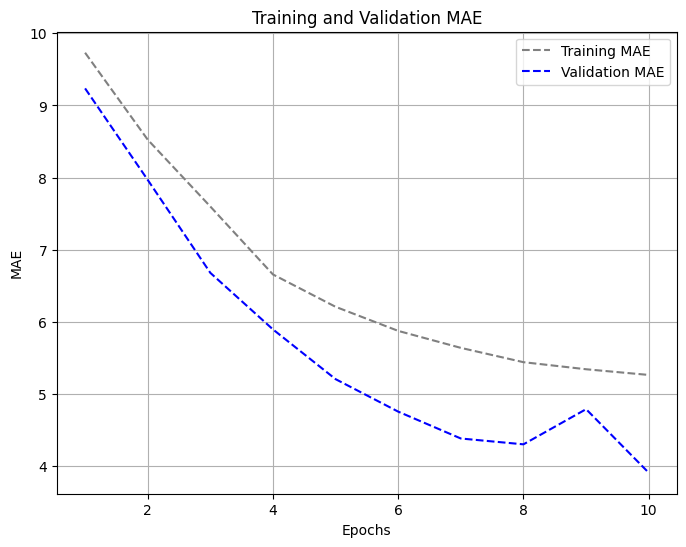

In [48]:
import matplotlib.pyplot as plt

# Extract the MAE values from the training history of the model
train_mae = train_history.history["mae"]  # Training Mean Absolute Error (MAE)
val_mae = train_history.history["val_mae"]  # Validation Mean Absolute Error (MAE)

# Create a range for epochs
epochs_range = range(1, len(train_mae) + 1)  # Total number of epochs

# Plotting the Training and Validation MAE
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.plot(epochs_range, train_mae, color="grey", linestyle="dashed", label="Training MAE")  # Plot training MAE
plt.plot(epochs_range, val_mae, color="blue", linestyle="dashed", label="Validation MAE")  # Plot validation MAE
plt.title("Training and Validation MAE")  # Title of the plot
plt.xlabel("Epochs")  # X-axis label
plt.ylabel("MAE")  # Y-axis label
plt.legend()  # Show the legend
plt.grid(True)  # Optional: Add gridlines for better readability
plt.show()  # Display the plot


### **3.LSTM - Stacked setup with 16 units**

In [54]:
# Define the input shape for the LSTM model
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

# Stacked LSTM layers with the first LSTM layer returning sequences for the next LSTM layer
x = layers.LSTM(16, return_sequences=True)(inputs)  # First LSTM layer
x = layers.LSTM(16)(x)  # Second LSTM layer
outputs = layers.Dense(1)(x)  # Output layer

# Create the model by specifying input and output layers
model = keras.Model(inputs, outputs)

# Define callbacks including saving the best model based on validation loss
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked1.keras", save_best_only=True)
]

# Compile the model with RMSprop optimizer, MSE loss, and MAE as a metric
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Train the model on the training dataset for 10 epochs and use validation dataset for evaluation
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

# Load the best model saved during training
model = keras.models.load_model("jena_LSTM_stacked1.keras")

# Evaluate the model performance on the test dataset and print the test MAE
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 103s 121ms/step - loss: 57.9155 - mae: 5.8742 - val_loss: 39.1626 - val_mae: 4.8925
Epoch 2/10
819/819 [==============================] - 99s 120ms/step - loss: 26.2329 - mae: 3.9987 - val_loss: 23.9140 - val_mae: 3.8671
Epoch 3/10
819/819 [==============================] - 103s 126ms/step - loss: 24.2162 - mae: 3.8506 - val_loss: 23.3370 - val_mae: 3.7649
Epoch 4/10
819/819 [==============================] - 101s 124ms/step - loss: 23.0559 - mae: 3.7550 - val_loss: 20.6185 - val_mae: 3.5352
Epoch 5/10
819/819 [==============================] - 100s 122ms/step - loss: 21.4186 - mae: 3.6252 - val_loss: 18.8526 - val_mae: 3.4436
Epoch 6/10
819/819 [==============================] - 101s 123ms/step - loss: 19.9893 - mae: 3.5032 - val_loss: 19.2639 - val_mae: 3.4609
Epoch 7/10
819/819 [==============================] - 98s 120ms/step - loss: 19.2313 - mae: 3.4399 - val_loss: 17.2458 - val_mae: 3.2983
Epoch 8/10
819/819 [================

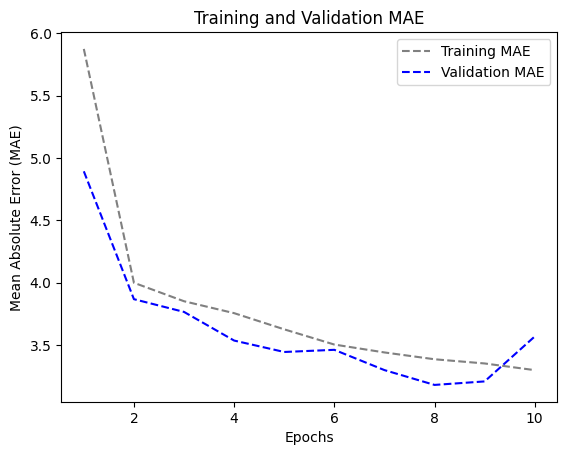

In [56]:
# Extract the MAE (Mean Absolute Error) values from the training history
train_mae = history.history["mae"]  # Training MAE values
val_mae = history.history["val_mae"]  # Validation MAE values

# Create a range of epochs based on the length of the training history
epochs_range = range(1, len(train_mae) + 1)

# Plotting the Training and Validation MAE curves
plt.figure()

# Plot the Training MAE curve
plt.plot(epochs_range, train_mae, color="grey", linestyle="dashed", label="Training MAE")

# Plot the Validation MAE curve
plt.plot(epochs_range, val_mae, color="blue", linestyle="dashed", label="Validation MAE")

# Adding title, labels, and legend
plt.title("Training and Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()

# Display the plot
plt.show()


### **4.LSTM - Stacked setup with 32 units**

In [58]:
# Define the model structure with stacked LSTM layers
input_layer = keras.Input(shape=(sequence_length, raw_data.shape[-1]))  # Input layer with sequence length and number of features
x = layers.LSTM(32, return_sequences=True)(input_layer)  # First LSTM layer, returns sequences
x = layers.LSTM(32)(x)  # Second LSTM layer, outputs the final state
output_layer = layers.Dense(1)(x)  # Dense layer with 1 output for regression (temperature prediction)

# Create the model
model_stacked_lstm = keras.Model(input_layer, output_layer)

# Callbacks to save the best model during training
callbacks_stacked_lstm = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked2.keras", save_best_only=True)
]

# Compile the model with RMSprop optimizer and MSE loss
model_stacked_lstm.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Train the model on the training dataset for 10 epochs, with validation data and callbacks
history_stacked_lstm = model_stacked_lstm.fit(train_dataset,
                                              epochs=10,
                                              validation_data=val_dataset,
                                              callbacks=callbacks_stacked_lstm)

# Load the best model after training and evaluate on the test dataset
model_stacked_lstm = keras.models.load_model("jena_LSTM_stacked2.keras")
test_mae = model_stacked_lstm.evaluate(test_dataset)[1]  # Test MAE from the model evaluation
print(f"Test MAE: {test_mae:.2f}")


Epoch 1/10
819/819 [==============================] - 148s 176ms/step - loss: 33.4216 - mae: 4.4485 - val_loss: 18.1697 - val_mae: 3.3800
Epoch 2/10
819/819 [==============================] - 148s 181ms/step - loss: 17.4648 - mae: 3.2898 - val_loss: 14.9298 - val_mae: 3.0259
Epoch 3/10
819/819 [==============================] - 148s 181ms/step - loss: 15.8089 - mae: 3.1333 - val_loss: 14.9349 - val_mae: 3.0218
Epoch 4/10
819/819 [==============================] - 148s 181ms/step - loss: 15.0444 - mae: 3.0539 - val_loss: 14.2031 - val_mae: 2.9451
Epoch 5/10
819/819 [==============================] - 147s 180ms/step - loss: 13.9091 - mae: 2.9360 - val_loss: 13.1881 - val_mae: 2.8515
Epoch 6/10
819/819 [==============================] - 144s 176ms/step - loss: 12.9233 - mae: 2.8260 - val_loss: 12.1822 - val_mae: 2.7395
Epoch 7/10
819/819 [==============================] - 144s 176ms/step - loss: 12.5350 - mae: 2.7813 - val_loss: 14.9360 - val_mae: 3.0368
Epoch 8/10
819/819 [==============

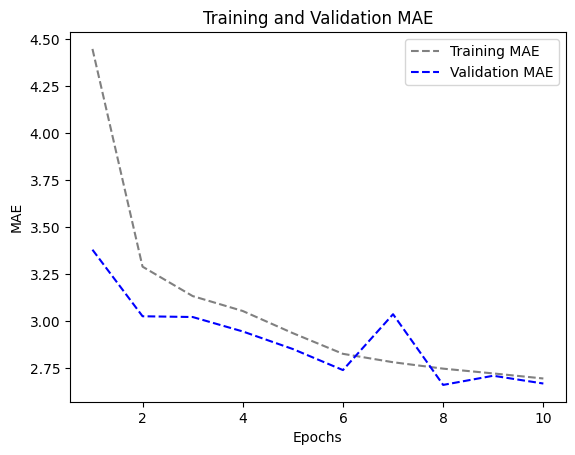

In [59]:
import matplotlib.pyplot as plt

# Extract the MAE (Mean Absolute Error) values from the training history of the stacked LSTM model
training_mae = history_stacked_lstm.history["mae"]  # Training MAE values
validation_mae = history_stacked_lstm.history["val_mae"]  # Validation MAE values

# Create a range for epochs, based on the number of epochs in the training history
epochs_range = range(1, len(training_mae) + 1)

# Plotting the Training and Validation MAE
plt.figure()
plt.plot(epochs_range, training_mae, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs_range, validation_mae, color="blue", linestyle="dashed", label="Validation MAE")
plt.title("Training and Validation MAE")  # Title for the plot
plt.xlabel("Epochs")  # Label for the x-axis
plt.ylabel("MAE")  # Label for the y-axis
plt.legend()  # Display legend
plt.show()  # Show the plot


### **4.LSTM - Stacked setup with 8 units**

In [60]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))  # Input layer with a sequence length and feature dimension
x = layers.LSTM(8, return_sequences=True)(inputs)  # First LSTM layer with return_sequences=True
x = layers.LSTM(8)(x)  # Second LSTM layer with return_sequences=False
outputs = layers.Dense(1)(x)  # Output layer with a single neuron for regression
model = keras.Model(inputs, outputs)  # Define the model with the input and output layers

# Define the callback to save the best model based on validation loss
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked3.keras", save_best_only=True)
]

# Compile the model with RMSprop optimizer and MSE loss function, and MAE metric
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Train the model with training dataset, for 10 epochs, and use validation dataset
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

# Load the best saved model and evaluate its performance on the test dataset
model = keras.models.load_model("jena_LSTM_stacked3.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 87s 102ms/step - loss: 93.0972 - mae: 7.8163 - val_loss: 65.7584 - val_mae: 6.6754
Epoch 2/10
819/819 [==============================] - 84s 102ms/step - loss: 76.1814 - mae: 7.0722 - val_loss: 65.5124 - val_mae: 6.6632
Epoch 3/10
819/819 [==============================] - 83s 101ms/step - loss: 76.1811 - mae: 7.0721 - val_loss: 65.5044 - val_mae: 6.6628
Epoch 4/10
819/819 [==============================] - 83s 101ms/step - loss: 76.1804 - mae: 7.0722 - val_loss: 65.5014 - val_mae: 6.6627
Epoch 5/10
819/819 [==============================] - 83s 101ms/step - loss: 76.1812 - mae: 7.0721 - val_loss: 65.5036 - val_mae: 6.6628
Epoch 6/10
819/819 [==============================] - 82s 101ms/step - loss: 76.1808 - mae: 7.0721 - val_loss: 65.4817 - val_mae: 6.6617
Epoch 7/10
819/819 [==============================] - 82s 100ms/step - loss: 76.1810 - mae: 7.0722 - val_loss: 65.4800 - val_mae: 6.6616
Epoch 8/10
819/819 [=====================

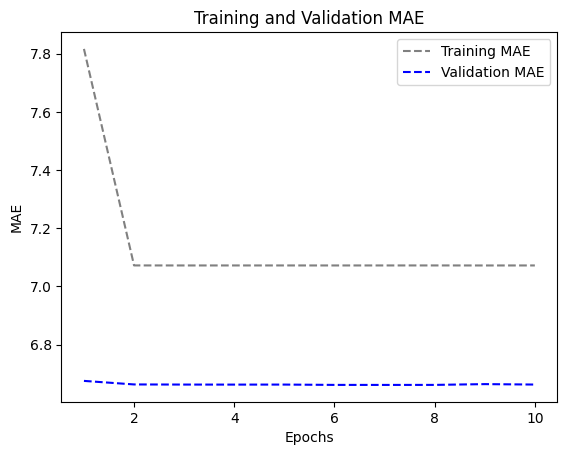

In [61]:
import matplotlib.pyplot as plt

# Extract MAE values from the training history
training_mae = history.history["mae"]  # MAE for training
validation_mae = history.history["val_mae"]  # MAE for validation

# Define the epochs for plotting
epochs_range = range(1, len(training_mae) + 1)

# Plotting the MAE values
plt.figure()
plt.plot(epochs_range, training_mae, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs_range, validation_mae, color="blue", linestyle="dashed", label="Validation MAE")

# Set plot title and labels
plt.title("Training and Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")

# Display legend
plt.legend()

# Show the plot
plt.show()


### **5.LSTM - dropout-regularized, stacked model**

In [65]:
# Define input shape based on the sequence length and raw data
input_layer = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

# First LSTM layer with recurrent dropout, returning sequences
x = layers.LSTM(16, recurrent_dropout=0.4, return_sequences=True)(input_layer)

# Second LSTM layer with recurrent dropout
x = layers.LSTM(16, recurrent_dropout=0.4)(x)

# Dropout layer to reduce overfitting
x = layers.Dropout(0.5)(x)

# Output layer for regression (single value output)
output_layer = layers.Dense(1)(x)

# Create the model
model = keras.Model(input_layer, output_layer)

# Define callbacks, saving the best model based on validation loss
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_LSTM_with_dropout_v2.keras",
                                    save_best_only=True)
]

# Compile the model with RMSprop optimizer, MSE loss, and MAE metric
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Train the model on the training dataset with validation and callbacks
history = model.fit(train_dataset,
                    epochs=12,
                    validation_data=val_dataset,
                    callbacks=callbacks)

# Load the best model after training
model = keras.models.load_model("jena_stacked_LSTM_with_dropout_v2.keras")

# Evaluate the model on the test dataset and print the MAE
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Epoch 1/12
819/819 [==============================] - 125s 148ms/step - loss: 58.5463 - mae: 5.9460 - val_loss: 23.2405 - val_mae: 3.7441
Epoch 2/12
819/819 [==============================] - 121s 147ms/step - loss: 32.8201 - mae: 4.4813 - val_loss: 19.9417 - val_mae: 3.5238
Epoch 3/12
819/819 [==============================] - 124s 152ms/step - loss: 30.2119 - mae: 4.2877 - val_loss: 18.1030 - val_mae: 3.2952
Epoch 4/12
819/819 [==============================] - 128s 156ms/step - loss: 28.4912 - mae: 4.1640 - val_loss: 24.3945 - val_mae: 3.9530
Epoch 5/12
819/819 [==============================] - 127s 155ms/step - loss: 24.4628 - mae: 3.8654 - val_loss: 18.2952 - val_mae: 3.4007
Epoch 6/12
819/819 [==============================] - 126s 154ms/step - loss: 23.2529 - mae: 3.7616 - val_loss: 16.0910 - val_mae: 3.1381
Epoch 7/12
819/819 [==============================] - 124s 152ms/step - loss: 22.4537 - mae: 3.6887 - val_loss: 14.1493 - val_mae: 2.9291
Epoch 8/12
819/819 [==============

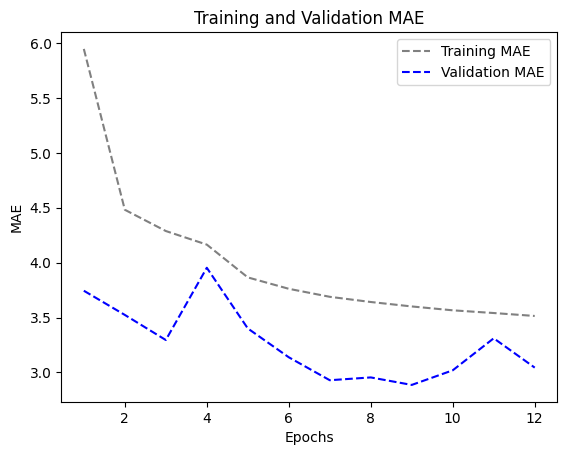

In [68]:
import matplotlib.pyplot as plt

# Extract the Mean Absolute Error (MAE) values from the training history
training_mae_new = history.history["mae"]
validation_mae_new = history.history["val_mae"]

# Define a range of epochs based on the length of the MAE history
epochs = range(1, len(training_mae_new) + 1)

# Create the plot for training and validation MAE
plt.figure()
plt.plot(epochs, training_mae_new, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs, validation_mae_new, color="blue", linestyle="dashed", label="Validation MAE")

# Add title and axis labels to the plot
plt.title("Training and Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")

# Display the legend to differentiate between training and validation curves
plt.legend()

# Show the plot
plt.show()


## **Bidirectional LSTM**

In [69]:
# Define the input layer with shape based on sequence length and raw data
input_layer = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

# Create a Bidirectional LSTM layer with 16 units
x = layers.Bidirectional(layers.LSTM(16))(input_layer)

# Define the output layer
output_layer = layers.Dense(1)(x)

# Create the model with input and output layers
model = keras.Model(input_layer, output_layer)

# Define the callbacks to save the best model during training
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_bidirectional_LSTM.keras", save_best_only=True)
]

# Compile the model with RMSprop optimizer and Mean Squared Error loss
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Train the model with the training data and validation data, including callbacks
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

# Load the best model saved during training
model = keras.models.load_model("jena_bidirectional_LSTM.keras")

# Evaluate the model on the test dataset and print the Mean Absolute Error (MAE)
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 61s 71ms/step - loss: 84.9223 - mae: 7.3466 - val_loss: 49.0193 - val_mae: 5.5862
Epoch 2/10
819/819 [==============================] - 55s 68ms/step - loss: 47.4156 - mae: 5.2995 - val_loss: 32.6473 - val_mae: 4.4634
Epoch 3/10
819/819 [==============================] - 56s 69ms/step - loss: 33.0186 - mae: 4.3345 - val_loss: 23.2755 - val_mae: 3.6759
Epoch 4/10
819/819 [==============================] - 56s 68ms/step - loss: 25.2127 - mae: 3.7938 - val_loss: 20.1233 - val_mae: 3.4295
Epoch 5/10
819/819 [==============================] - 57s 69ms/step - loss: 20.4143 - mae: 3.4477 - val_loss: 17.1131 - val_mae: 3.1765
Epoch 6/10
819/819 [==============================] - 58s 71ms/step - loss: 17.9993 - mae: 3.2741 - val_loss: 16.5009 - val_mae: 3.1508
Epoch 7/10
819/819 [==============================] - 58s 71ms/step - loss: 16.9925 - mae: 3.2046 - val_loss: 15.8296 - val_mae: 3.0859
Epoch 8/10
819/819 [============================

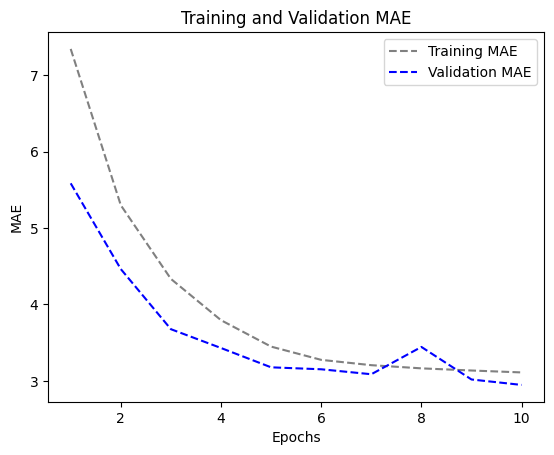

In [70]:
# Extract the MAE values from the training history of the Bidirectional LSTM model
train_mae = history.history["mae"]
val_mae = history.history["val_mae"]

# Create a range for epochs
epoch_range = range(1, len(train_mae) + 1)

# Create a new figure for plotting
plt.figure()

# Plot Training MAE in grey with dashed lines
plt.plot(epoch_range, train_mae, color="grey", linestyle="dashed", label="Training MAE")

# Plot Validation MAE in blue with dashed lines
plt.plot(epoch_range, val_mae, color="blue", linestyle="dashed", label="Validation MAE")

# Add titles and labels
plt.title("Training and Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


### **1D Convnets and LSTM togther**

In [71]:
# Define the input shape based on sequence length and raw data shape
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

# First Convolutional Layer with 64 filters and a kernel size of 3
x = layers.Conv1D(64, 3, activation='relu')(inputs)

# MaxPooling Layer with pool size of 3
x = layers.MaxPooling1D(3)(x)

# Second Convolutional Layer with 128 filters and a kernel size of 3
x = layers.Conv1D(128, 3, activation='relu')(x)

# Global MaxPooling to reduce dimensionality
x = layers.GlobalMaxPooling1D()(x)

# Reshape the output to 3D format required by LSTM layer
x = layers.Reshape((-1, 128))(x)  # Reshape to (batch_size, time_steps, features)

# LSTM Layer with 16 units
x = layers.LSTM(16)(x)

# Output Dense layer with a single unit for regression output
outputs = layers.Dense(1)(x)

# Build the model
model = keras.Model(inputs, outputs)

# Compile the model with RMSprop optimizer, MSE loss, and MAE metric
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Set up model checkpoints to save the best model during training
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_Conv_LSTM_model.keras", save_best_only=True)
]

# Train the model for 10 epochs, with validation data and callbacks
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

# Load the best saved model after training
model = keras.models.load_model("jena_Conv_LSTM_model.keras")

# Evaluate the model on the test dataset and print the Mean Absolute Error (MAE)
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 33s 37ms/step - loss: 118.0414 - mae: 8.8696 - val_loss: 92.7153 - val_mae: 7.8646
Epoch 2/10
819/819 [==============================] - 31s 37ms/step - loss: 82.9680 - mae: 7.3874 - val_loss: 67.1706 - val_mae: 6.7425
Epoch 3/10
819/819 [==============================] - 31s 38ms/step - loss: 76.2137 - mae: 7.0742 - val_loss: 65.5039 - val_mae: 6.6628
Epoch 4/10
819/819 [==============================] - 31s 38ms/step - loss: 76.1798 - mae: 7.0721 - val_loss: 65.5391 - val_mae: 6.6646
Epoch 5/10
819/819 [==============================] - 31s 38ms/step - loss: 76.1800 - mae: 7.0722 - val_loss: 65.5236 - val_mae: 6.6638
Epoch 6/10
819/819 [==============================] - 31s 38ms/step - loss: 76.1797 - mae: 7.0722 - val_loss: 65.5469 - val_mae: 6.6649
Epoch 7/10
819/819 [==============================] - 30s 37ms/step - loss: 76.1797 - mae: 7.0721 - val_loss: 65.5237 - val_mae: 6.6638
Epoch 8/10
819/819 [===========================

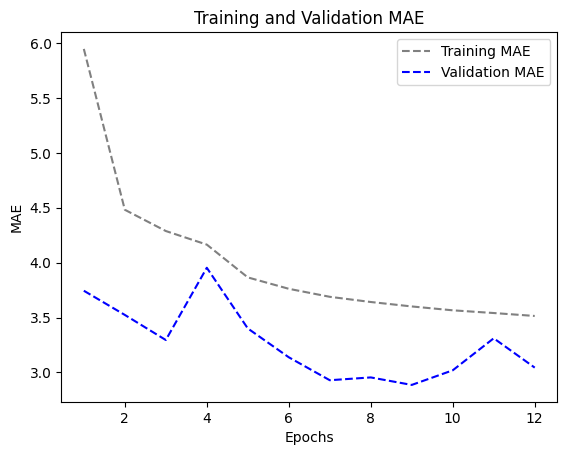

In [67]:
import matplotlib.pyplot as plt

# Extract MAE values from the training history of the model
train_mae = history.history["mae"]
val_mae = history.history["val_mae"]

# Define the range for epochs (from 1 to the number of epochs)
epoch_range = range(1, len(train_mae) + 1)

# Plot the Training and Validation MAE values
plt.figure()
plt.plot(epoch_range, train_mae, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epoch_range, val_mae, color="blue", linestyle="dashed", label="Validation MAE")

# Set plot title and labels
plt.title("Training and Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")

# Add legend to the plot
plt.legend()

# Display the plot
plt.show()


We built 13 models: Following are the details;

**Model 1:** A sensible, non-machine-learning starting point

**Model 2:** Dense Layer, a fundamental machine-learning mode

**Model 3:** Let's try a 1D convolutional mode

**Model 4:** Simple RNN layer that can process sequences of any length

**Model 5:** Simple RNN - Stacking RNN layers

**Model 6:** A Simple GRU (Gated Recurrent Unit)

**Model 7:** LSTM-Simple

**Model 8:** LSTM - dropout Regularization

**Model 9:** LSTM Stacked setup with 16 units

**Model 10:** LSTM Stacked setup with 32 units

**Model 11:** LSTM Stacked setup with 8 units

**Model 12:** LSTM - dropout-regularized, stacked up with 8unit

**Model 13:** Bidirectional LSTM

**Model 14:** 1D Convnets and LSTM togther

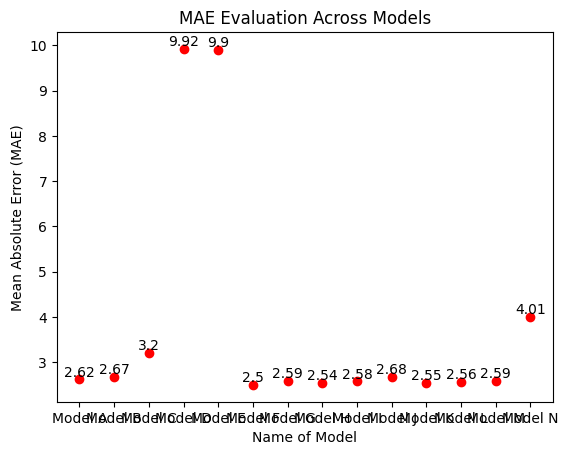

In [73]:
import matplotlib.pyplot as plt

# Model identifiers and corresponding MAE values
model_ids = ("Model A", "Model B", "Model C", "Model D", "Model E", "Model F", "Model G", "Model H", "Model I", "Model J", "Model K", "Model L", "Model M", "Model N")
mae_values = (2.62, 2.67, 3.2, 9.92, 9.9, 2.5, 2.59, 2.54, 2.58, 2.68, 2.55, 2.56, 2.59, 4.01)

# Scatter plot for MAE values of different models
plt.scatter(model_ids, mae_values, color="red")

# Title and axis labels
plt.title("MAE Evaluation Across Models")
plt.xlabel("Name of Model")
plt.ylabel("Mean Absolute Error (MAE)")

# Annotating each point with its respective MAE value
for (model, mae) in zip(model_ids, mae_values):
    plt.text(model, mae, str(mae), va='bottom', ha='center')

# Display the plot
plt.show()


<u>**Conclusion:-**</u> we produced a total of 14 models. The first one, which yielded 2.62 MAE, is merely the common sense baseline method and is not a machine learning model. Afterwards, we developed the fundamental machine learning model (danse layer), which produced an MAE of 2.67, marginally greater than the MAE of the common sense approach. Due to the connected approach's initial flattening of the timeseries, which eliminated the concept of time from the input data, the dense layer is not operating well. We also attempted a convolution model, but the results were really subpar since the convolutional method handled each data segment uniformly, even with pooling, which ruined the information's order.
Thus, RNN (Recurrent Neural Networks) is a particular design for time series data. An RNN's primary feature is its capacity to incorporate data from earlier stages into its current decision-making process. As a result, the network can identify patterns and dependencies in sequential data. An RNN can model sequences of any length since its internal state acts as a recollection of the prior inputs it has encountered. Generally speaking, the basic RNN is too basic to be useful.SimpleRNN specifically has a significant problem: The simple RNN performs the worst out of all of them, as the graph also shows. In theory, the SimpleRNN at any given time t can remember data from all prior times, but in practice, it hinders network learning. The reason for this is the **vanishing gradient problem**, which makes deep networks untrainable. To solve this issue, the LSTM and GRU RNNs were created and are a component of Keras. Because it can capture long-range dependencies in sequential data and is computationally less expensive than LSTMs, the simple GRU model we tried produced the best results out of all the models.

One of the most well-known architectures for handling time series data is LSTMs, and we tested six different LSTM models by altering the units in Recurrent layers are stacked at 8, 16, and 32. Out of the three units, 8 produced the best results. We also experimented with bidirectional data, which gives the same information to a recurrent network in several ways, improving accuracy and reducing the forgetting problem, and recurrent dropout, which prevents overfitting. These models are all lower than the common sense model and have MAE values that are close to one another. The MAE evaluation graph allows us to verify this.


In the end, we also constructed a model by combining an RNN with a 1D convolution model, however it produced a subpar 4.01 MAE, most likely because to the convolution limitation that destroys information order.

<u>**Recommendation:-**</u> I've seen that simple RNNs have trouble capturing long-term dependencies because of the vanishing gradient problem. More sophisticated RNN architectures, including LSTM and GRU, are recommended because they are made to address these problems. Additionally, because it can capture long-term dependencies, LSTM is a common choice for handling time series data. However, investigations have indicated that GRU can be a more effective option. I advise attempting to optimize GRU by adjusting the hyperparameters, including the recurrent dropout rate, the number of units in the stacked recurrent layers, and the utilization of bidirectional data.
**

The combination of 1D convolution and RNN did not produce the best performance, according to my data. **It is advised to concentrate on architectures that are explicitly designed for handling sequential data, such as pure RNNs, given the limitations of the convolutional approach in destroying the order of information in your time series data.**
